In [44]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sb
import numpy as np

import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

plt.style.use('ggplot') 

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


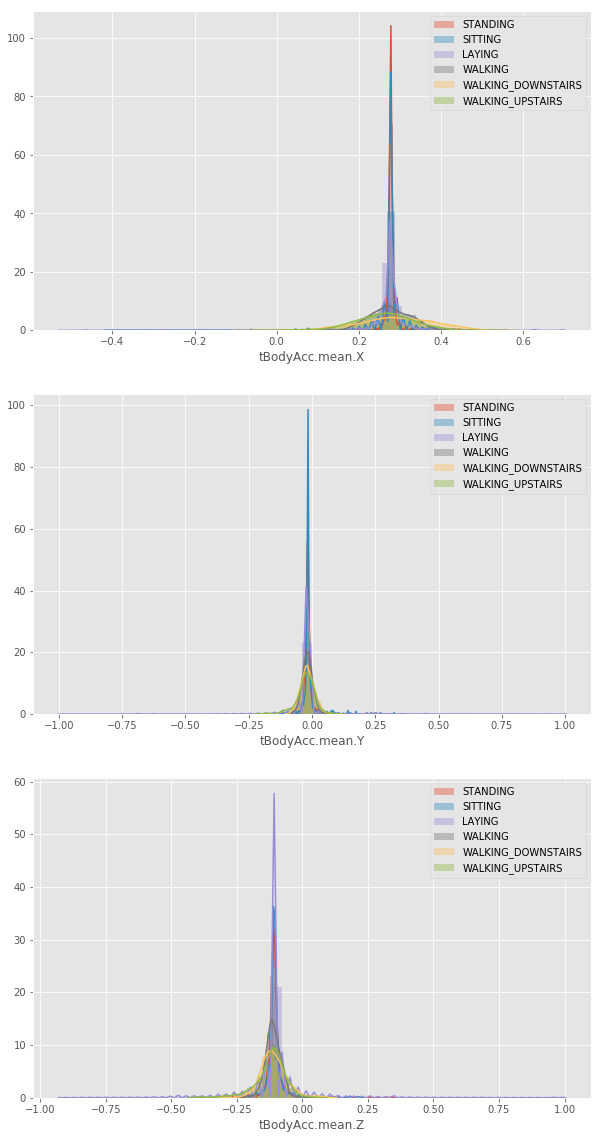

In [26]:
#plotting feature densities 
features = ['tBodyAcc.mean.X','tBodyAcc.mean.Y','tBodyAcc.mean.Z']
unique = train.activity.unique()

plt.rcParams['figure.figsize'] = (10,20)
figure,axis = plt.subplots(len(features),1)

for i in range(0,len(features)):
    for j in unique:
        activity = train[train.activity == j]
        sb.distplot(activity[features[i]],ax=axis[i])
        axis[i].legend(labels=unique)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


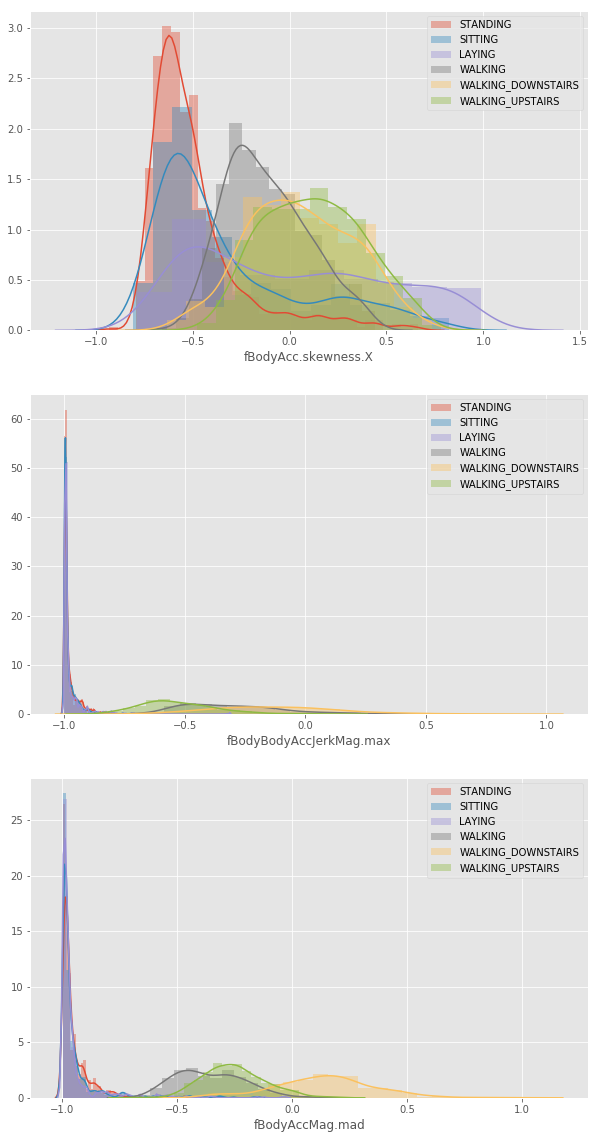

In [28]:
#plotting more feature densities
features = ['fBodyAcc.skewness.X','fBodyBodyAccJerkMag.max','fBodyAccMag.mad']
unique = train.activity.unique()

plt.rcParams['figure.figsize'] = (10,20)
figure,axis = plt.subplots(len(features),1)

for i in range(0,len(features)):
    for j in unique:
        activity = train[train.activity == j]
        sb.distplot(activity[features[i]],ax=axis[i])
        axis[i].legend(labels=unique)

In [45]:
#encode activity response to 0,...,5
encoder = LabelEncoder()
encoder.fit(train.activity)

y_train = encoder.transform(train.activity)
x_train = train.drop(['rn','activity'],axis=1)

test_id =  test.rn
x_test = test.drop(['rn'],axis=1)


x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size=0.2,random_state=13)

train = xgb.DMatrix(x_train,label=y_train)
validation = xgb.DMatrix(x_validation,label=y_validation)
test = xgb.DMatrix(x_test)

#just using common settings, in reality, should be using bayesian 
#optimization search for brevity. 
params = {
    'max_depth': 10,
    'eta': 0.1,
    'silent':1,
    'objective':'multi:softprob',
    'early_stopping_rounds': 10,
    'num_class':6
}

model = xgb.train(params,train)

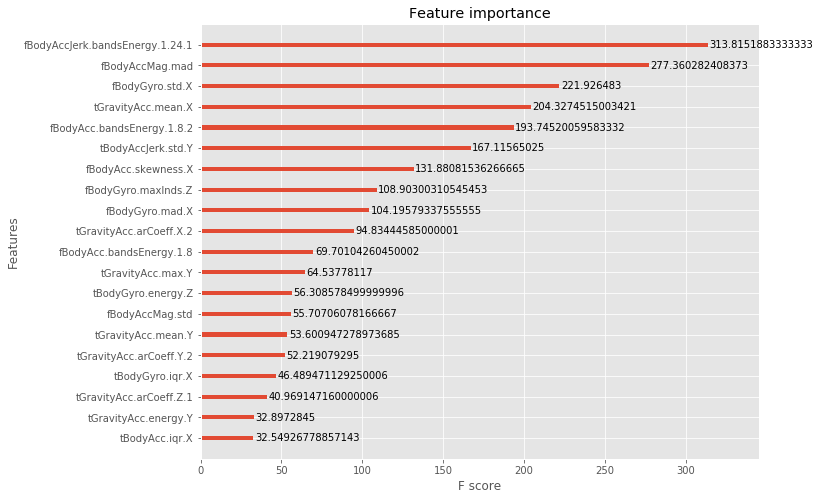

In [42]:
xgb.plot_importance(model,max_num_features=20,importance_type='gain')

Text(0.5, 1.0, 'Training Accuracy Score: 0.998268')

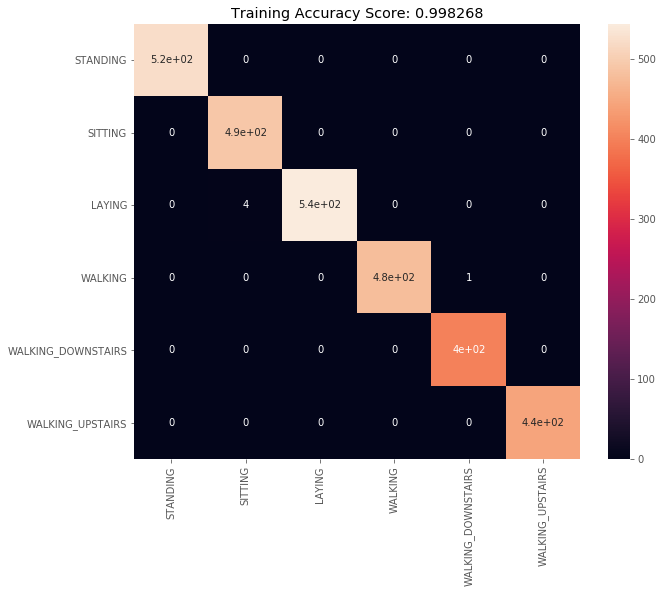

In [37]:
train_pred = model.predict(train)
pred = np.argmax(train_pred,axis=1)

cm = confusion_matrix(pred,y_train)
acc_score = accuracy_score(pred,y_train)

plt.rcParams['figure.figsize'] = (10,8)
hm = sb.heatmap(cm,annot=True)
hm.set_xticklabels(unique,rotation='vertical')
hm.set_yticklabels(unique,rotation='horizontal')
hm.set_title('Training Accuracy Score: {:3f}'.format(acc_score))

Text(0.5, 1.0, 'Training Accuracy Score: 0.947368')

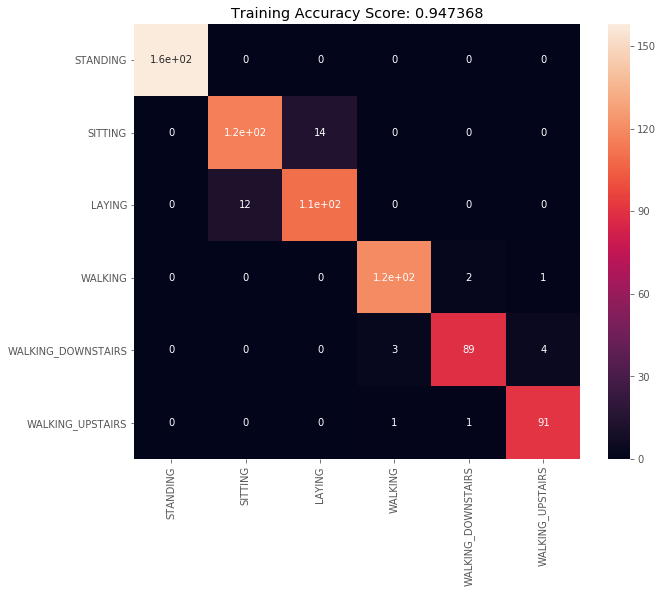

In [38]:
validation_pred = model.predict(validation)
pred = np.argmax(validation_pred,axis=1)

cm = confusion_matrix(pred,y_validation)
acc_score = accuracy_score(pred,y_validation)

plt.rcParams['figure.figsize'] = (10,8)
hm = sb.heatmap(cm,annot=True)
hm.set_xticklabels(unique,rotation='vertical')
hm.set_yticklabels(unique,rotation='horizontal')
hm.set_title('Training Accuracy Score: {:3f}'.format(acc_score))

In [51]:
test_pred = model.predict(test)
pred = np.argmax(test_pred,axis=1)
labels = unique[pred]

data = {'rn':test_id,'activity':labels}
result = pd.DataFrame(data=data)
result.tail()

,rn,activity
1536,10255,WALKING_DOWNSTAIRS
1537,10270,WALKING_UPSTAIRS
1538,10272,WALKING_UPSTAIRS
1539,10289,WALKING_DOWNSTAIRS
1540,10294,WALKING_UPSTAIRS
